In [17]:
import os
import pandas as pd

In [36]:
cols = ['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id', 'host_name', 'host_since', 
        'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
        'host_listings_count', 'host_total_listings_count', 'host_verifications', 'latitude', 'longitude', 
        'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 
        'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 
        'first_review', 'last_review', 'review_scores_rating', 'review_scores_cleanliness', 
        'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'license', 
        'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month']
key_fields=['review_scores_rating',]
df = pd.read_csv('listings.csv')
df['price'] = df.price.str.replace('$','').str.replace(',','').astype(float)
print(df.shape)

(19896, 74)


In [ ]:
"""df.drop(df[((df.latitude.isna())|(df.longitude.isna()))].index, axis=0, inplace=True)
df.drop(df[((df.latitude < 40)|(df.longitude > 1))].index, axis=0, inplace=True)
print(df.shape)"""

In [27]:
'''df.drop(index=(df.isna().index),inplace=True)
print(df.shape)'''

(0, 74)


In [39]:
df.drop(index=(df[(df.host_response_rate.isna()) | (df.review_scores_rating.isna()) | (df.price.isna())].index), inplace=True)
print(df.shape)

In [39]:
#delete the label/header.

df.columns = df.iloc[0]
df = df.reindex(df.index.drop(0)).reset_index(drop=True)
df.columns.name = None

print(df.shape)

In [39]:
df.sample(2, random_state=42)

In [41]:
#save as csv file without index number
df.to_csv('df_to_csv.csv',index=False)

### correlation matrix

In [ ]:
# This program creates a correlation matrix from data stored in a csv file.
# It then saves the correlation matrix as a csv file.

# The data file must be in columns of numbers - no column labels, etc.
# Each column is a data series, X0, X1, X2, etc.

# This data must be saved as a csv file (e.g. use "Save As" in Excel and choose csv format).
# It must be saved in the same folder as this program.
# See the file demo_multreg_data_example.csv for reference.

# In the next line, replace demo_multreg_data_example.csv with the filename of your data:
data_filename = 'listings_edited.csv'

# In the next line, replace correlation_matrix with the filename you wish to save as:
output_filename = 'correlation_matrix.csv'

# The next lines import the necessary package to create the correlation analysis:
import numpy as np

data = np.genfromtxt(data_filename,delimiter = ',')

# If there are errors importing the data, you can also copy it in as follows:
# e.g. data = [[737.4776314, 34, 65],
#              [869.2063792, 57, 73],
#              [1033.705248, 59, 100],
#              ...
#              [737.5129466, 66, 49]]
# (Compare this example with the file demo_multreg_data_example.csv)

# These lines create the correlation matrix and print it:
correlation_matrix = np.corrcoef(data.T)
print(correlation_matrix)

# correlation_matrix[i,j] is the correlation between the series Xi and Xj.

# The next line saves the correlation matrix as a csv file:
#np.savetxt(output_filename,correlation_matrix,delimiter=',')

In [12]:
df1 = pd.read_csv('listings_edited.csv')

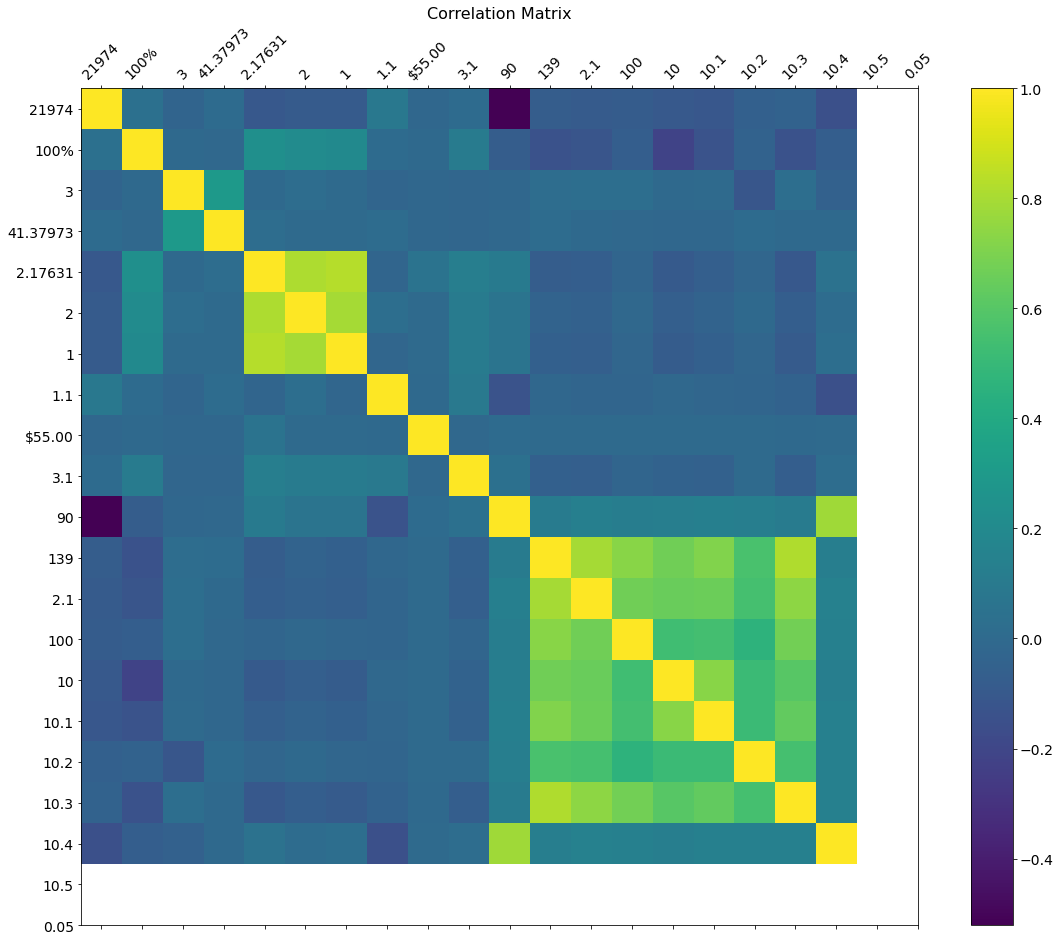

In [14]:
import matplotlib.pyplot as plt

#plt.matshow(dataframe.corr())
#plt.show()

f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=14, rotation=45)
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);